<a href="https://colab.research.google.com/github/jaoviedoc/Estructuras_Hidraulicas/blob/main/CE_Proyecto_Final_MiguelBermudez_JaimeOviedo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install sweetviz

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sweetviz as sv
import seaborn as sns

np.random.seed(123)

In [4]:
# DataFrame original con los datos
df = pd.read_excel("/content/drive/MyDrive/DATAÑAME.xlsx")

# Obtener los tratamientos únicos
tratamientos = df['Tratamiento'].unique()

# Crear el dataframe de entrenamiento vacío
df_entrenamiento = pd.DataFrame()

# Iterar sobre cada tratamiento y seleccionar el 75% de las filas al azar
for tratamiento in tratamientos:
    df_tratamiento = df[df['Tratamiento'] == tratamiento]
    n_filas = int(len(df_tratamiento) * 0.75)
    indices_entrenamiento = np.random.choice(df_tratamiento.index, size=n_filas, replace=False)
    df_entrenamiento = df_entrenamiento.append(df_tratamiento.loc[indices_entrenamiento])

# Mostrar el dataframe de entrenamiento
print(df_entrenamiento)

    Tratamiento   L_ext  a_ext  b_ext  Chroma_ext   Hue_ext   L_int   a_int  \
5             0  46.470  4.115  16.19   16.705000  1.321500  38.190  21.715   
0             0  39.720  7.110  14.77   16.392224  1.122154  47.800  19.810   
4             0  45.660  4.390  17.55   18.090732  1.325684  37.050  22.080   
9             0  42.050  4.250  16.66   17.193548  1.321022  37.510  22.720   
8             0  43.645  4.770  17.52   18.160500  1.304090  42.530  20.890   
7             0  44.480  4.840  16.56   17.252803  1.286446  43.200  20.900   
10            0  45.060  3.780  16.18   16.615679  1.341291  35.390  21.670   
3             0  47.280  3.840  14.83   15.319089  1.317426  39.330  21.350   
1             0  39.770  6.880  13.49   15.143134  1.099175  46.480  20.370   
18            1  34.570  7.460  13.66   15.564292  1.070937  50.610  19.825   
14            1  26.030  4.320   7.74    8.863972  1.061725  46.390  20.625   
17            1  45.930  6.380  17.70   18.814739  1

<ipython-input-4-bf873855fb0d>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_entrenamiento = df_entrenamiento.append(df_tratamiento.loc[indices_entrenamiento])
<ipython-input-4-bf873855fb0d>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_entrenamiento = df_entrenamiento.append(df_tratamiento.loc[indices_entrenamiento])
<ipython-input-4-bf873855fb0d>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_entrenamiento = df_entrenamiento.append(df_tratamiento.loc[indices_entrenamiento])
<ipython-input-4-bf873855fb0d>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_entrenamiento = df_entrenamiento.append(df_tratamiento.loc[

In [ ]:
# Crear el reporte descriptivo
advert_report = sv.analyze(df_entrenamiento)

# Mostrar el reporte en HTML
advert_report.show_html('reporte_descriptivo.html')

In [ ]:
# Crear dataframe de prueba excluyendo las filas de entrenamiento
test_df = df[~df.index.isin(df_entrenamiento.index)]

compare_report = sv.compare([df_entrenamiento, 'Training Data'], [test_df, 'Test Data'])
compare_report.show_html('resultados_comparacion.html')

In [ ]:
compare_report = sv.compare([df_entrenamiento, 'Training Data'], [test_df, 'Test Data'],'Hue_int')
compare_report.show_html('resultados_comparacion1.html')

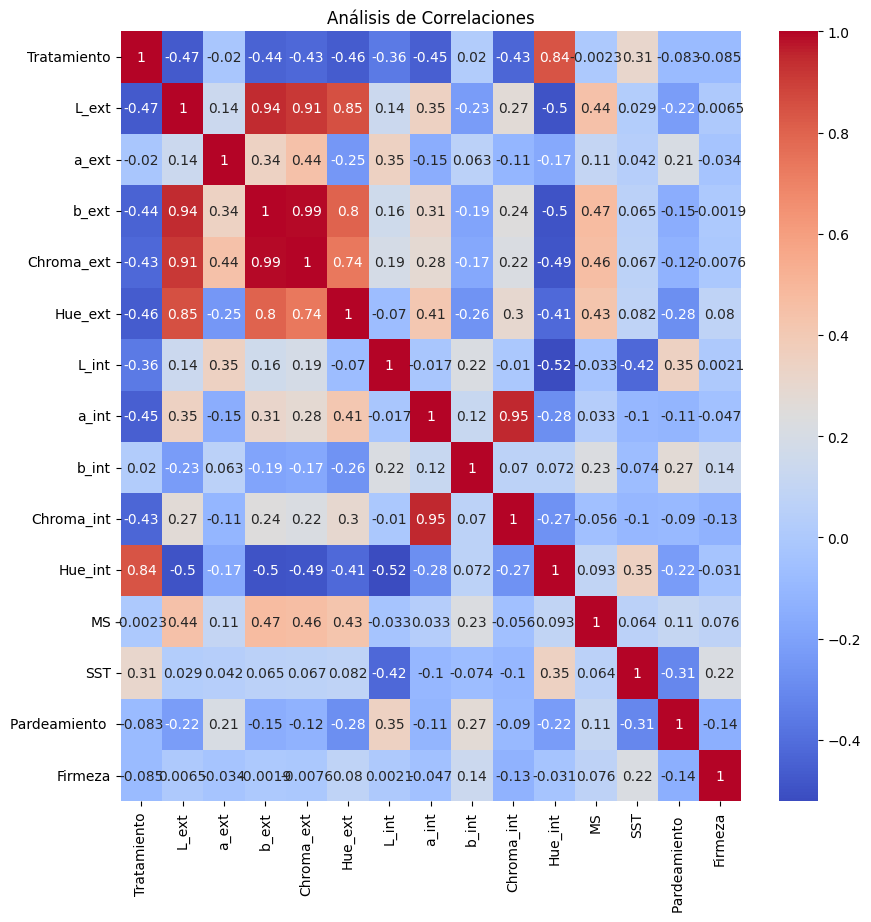

In [5]:
# Calcula la matriz de correlación
correlation_matrix = df_entrenamiento.corr()

plt.figure(figsize=(10, 10))  # Tamaño de la figura: ancho 10, alto 10
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Análisis de Correlaciones')
plt.show()

sección de Componentes principales (PCA)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [7]:
# DataFrame original con los datos
df = pd.read_excel("/content/drive/MyDrive/DATAÑAME.xlsx")

# Identificar la columna de tratamientos
columna_tratamiento = 'Tratamiento'

# Obtener la lista de tratamientos únicos
tratamientos_unicos = df[columna_tratamiento].unique()

# Crear una lista para almacenar los DataFrames seleccionados por tratamiento
dfs_entrenamiento = []

# Iterar sobre cada tratamiento y seleccionar el 75% de las filas al azar
for tratamiento in tratamientos_unicos:
    df_tratamiento = df[df[columna_tratamiento] == tratamiento]
    n_filas_tratamiento = len(df_tratamiento)
    n_filas_seleccionadas = int(n_filas_tratamiento * 0.75)
    df_seleccionado = df_tratamiento.sample(n=n_filas_seleccionadas, random_state=123)
    dfs_entrenamiento.append(df_seleccionado)

# Concatenar los DataFrames seleccionados en uno solo
df1 = pd.concat(dfs_entrenamiento)

# Verificar el DataFrame de entrenamiento
df1.head()

,Tratamiento,L_ext,a_ext,b_ext,Chroma_ext,Hue_ext,L_int,a_int,b_int,Chroma_int,Hue_int,MS,SST,Pardeamiento,Firmeza
5,0,46.470,4.115,16.19,16.705000,1.321500,38.19,21.715,-2.790,21.890000,-0.127860,26.897395,7.65,0.1370,9573.00
0,0,39.720,7.110,14.77,16.392224,1.122154,47.80,19.810,-2.610,19.981196,-0.130997,14.299676,7.70,0.1370,9946.78
4,0,45.660,4.390,17.55,18.090732,1.325684,37.05,22.080,-2.730,22.248130,-0.123017,26.897395,7.60,0.1360,9573.00
9,0,42.050,4.250,16.66,17.193548,1.321022,37.51,22.720,-1.280,22.756028,-0.056279,22.840000,8.60,0.1890,10462.67
8,0,43.645,4.770,17.52,18.160500,1.304090,42.53,20.890,-1.865,20.973100,-0.089000,27.308591,5.95,0.1795,11868.23


In [8]:
features = ['L_ext', 'a_ext', 'b_ext', 'Chroma_ext', 'Hue_ext',
       'L_int', 'a_int', 'b_int', 'Chroma_int', 'Hue_int', 'MS', 'SST',
       'Pardeamiento ', 'Firmeza']

# Eliminar filas con valores NaN
df1.dropna(subset=features + ['Tratamiento'], inplace=True)

# Separating out the features
x = df1.loc[:, features].values

# Separating out the target
y = df1.loc[:,['Tratamiento']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

DF_Standar = pd.DataFrame(data = x, columns = features)
Tratamiento_Std = pd.DataFrame(data = y, columns = ['Tratamiento'])
finalDF_Standar = pd.concat([DF_Standar, Tratamiento_Std], axis = 1)

DF_Standar.head()

,L_ext,a_ext,b_ext,Chroma_ext,Hue_ext,L_int,a_int,b_int,Chroma_int,Hue_int,MS,SST,Pardeamiento,Firmeza
0,1.054379,-1.046478,0.667457,0.545382,1.177715,-0.824219,1.459584,-1.135833,1.571521,-0.765102,0.185465,0.121776,-0.656469,-0.154025
1,0.218242,1.562705,0.306679,0.461833,-0.367621,1.314408,-0.131939,-0.876218,-0.080040,-0.777431,-1.367167,0.149059,-0.656469,0.061797
2,0.954042,-0.806903,1.012990,0.915542,1.210147,-1.077917,1.764522,-1.049295,1.881387,-0.746067,0.185465,0.094493,-0.661072,-0.154025
3,0.506864,-0.928869,0.786869,0.675884,1.174006,-0.975548,2.299207,1.042048,2.320837,-0.483770,-0.314597,0.640155,-0.417120,0.359674
4,0.704440,-0.475855,1.005368,0.934179,1.042752,0.141613,0.770342,0.198299,0.778188,-0.612373,0.236144,-0.805851,-0.460848,1.171250


In [9]:
# Realizar el PCA y crear el DataFrame de los componentes principales
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data=principalComponents,
                           columns=['principal component 1', 'principal component 2'])

# Mostrar el DataFrame resultante
principalDf.head()

,principal component 1,principal component 2
0,-2.430886,1.108294
1,-0.188003,0.035181
2,-2.851074,1.278912
3,-2.236068,2.561412
4,-2.025186,1.244120


In [10]:
Tratamiento_Std.head()

,Tratamiento
0,0
1,0
2,0
3,0
4,0


In [11]:
finalDf = pd.concat([principalDf, Tratamiento_Std], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Tratamiento
0,-2.430886,1.108294,0
1,-0.188003,0.035181,0
2,-2.851074,1.278912,0
3,-2.236068,2.561412,0
4,-2.025186,1.244120,0


In [12]:
primer_componente = pca.components_[0]
ecuacion_primer_componente = " + \n".join([f"{coef:.3f} * {variable}" for coef, variable in zip(primer_componente, features)])

print(f"Ecuación del primer componente:\n {ecuacion_primer_componente} ")

Ecuación del primer componente:
 -0.445 * L_ext + 
-0.061 * a_ext + 
-0.454 * b_ext + 
-0.446 * Chroma_ext + 
-0.430 * Hue_ext + 
0.058 * L_int + 
-0.216 * a_int + 
0.128 * b_int + 
-0.164 * Chroma_int + 
0.171 * Hue_int + 
-0.264 * MS + 
-0.109 * SST + 
0.035 * Pardeamiento  + 
-0.054 * Firmeza 


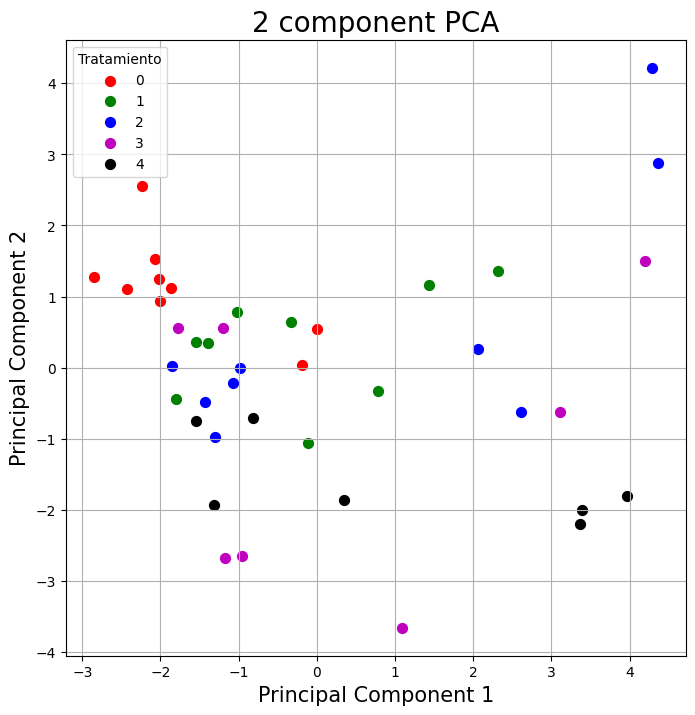

In [13]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0, 1, 2, 3, 4]
colors = ['r', 'g', 'b','m','k']
ax.grid()

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Tratamiento'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets, title="Tratamiento")

In [14]:
#Obtener la varianza explicada
varianza_explicada = pca.explained_variance_ratio_

# Crear el DataFrame de varianza explicada
df_varianza_explicada = pd.DataFrame({'Componente': ['Componente 1', 'Componente 2'],
                                      'Varianza Explicada': varianza_explicada})
print(df_varianza_explicada)

# Calcular el porcentaje total de información
porcentaje_total = sum(varianza_explicada) * 100

# Crear el texto con los porcentajes actualizados
texto = f"\n\nEl primer componente contiene el {varianza_explicada[0]*100:.1f}% de la varianza y el segundo componente principal contiene el {varianza_explicada[1]*100:.1f}% de la varianza.\n\nLos dos componentes contienen el {porcentaje_total:.1f}% de la información."

# Mostrar el texto
print(texto)

     Componente  Varianza Explicada
0  Componente 1            0.328029
1  Componente 2            0.175368


El primer componente contiene el 32.8% de la varianza y el segundo componente principal contiene el 17.5% de la varianza.

Los dos componentes contienen el 50.3% de la información.


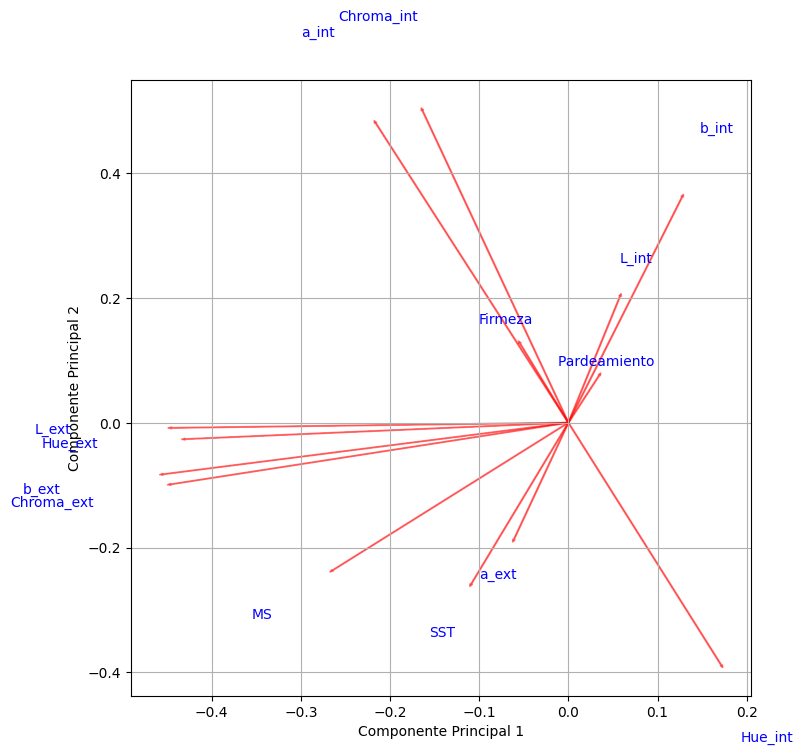

In [15]:
# Crear el biplot
plt.figure(figsize=(8, 8))

for i, feature in enumerate(features):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
    plt.text(pca.components_[0, i] * 1.3, pca.components_[1, i] * 1.3, feature, color='b', ha='center', va='center')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.show()

* Es importante tener en cuenta que la función ***f_oneway*** asume que los datos siguen una distribución normal y que las varianzas entre los grupos son iguales.

In [16]:
tratamientos = df[columna_tratamiento].unique()
variables = ['L_ext', 'a_ext', 'b_ext', 'Chroma_ext', 'Hue_ext', 'L_int', 'a_int', 'b_int', 'Chroma_int', 'Hue_int', 'SST', 'Firmeza']

resultados = []

for variable in variables:
    grupos = []
    n = 0

    for tratamiento in tratamientos:
        grupo = finalDF_Standar[finalDF_Standar[columna_tratamiento] == tratamiento][variable]
        grupos.append(grupo)
        n = len(grupo)

    p_value = round(stats.f_oneway(*grupos).pvalue, 3)
    resultados.append({'Variable': variable, 'p-valor': p_value, 'n': n})

df_resultados = pd.DataFrame(resultados)
print(df_resultados)


      Variable  p-valor  n
0        L_ext    0.124  7
1        a_ext    0.105  7
2        b_ext    0.219  7
3   Chroma_ext    0.220  7
4      Hue_ext    0.130  7
5        L_int    0.024  7
6        a_int    0.002  7
7        b_int    0.289  7
8   Chroma_int    0.001  7
9      Hue_int    0.000  7
10         SST    0.010  7
11     Firmeza    0.677  7


El análisis de varianza de Welch es una variante del análisis de varianza (ANOVA) que se utiliza cuando se asume que las varianzas de los grupos no son iguales

     fórmula del estadístico F de Welch

$$F = \frac{\text{{SS_between}} / \text{{df_between}}} {\text{{SS_within}} / \text{{df_within}}}$$

Donde:

* SS_between: Suma de cuadrados entre grupos.
* df_between: Grados de libertad entre grupos.
* SS_within: Suma de cuadrados dentro de los grupos.
* df_within: Grados de libertad dentro de los grupos ajustados por Welch


In [17]:
import pandas as pd
import scipy.stats as stats

tratamientos = df[columna_tratamiento].unique()
variables = ['L_ext', 'a_ext', 'b_ext', 'Chroma_ext', 'Hue_ext', 'L_int', 'a_int', 'b_int', 'Chroma_int', 'Hue_int', 'SST', 'Firmeza']

resultados = []

for variable in variables:
    grupos = []
    n = 0

    for tratamiento in tratamientos:
        grupo = finalDF_Standar[finalDF_Standar[columna_tratamiento] == tratamiento][variable]
        grupos.append(grupo)
        n = len(grupo)

    f_value, p_value = stats.f_oneway(*grupos)
    dfn = len(tratamientos) - 1  # Grados de libertad entre grupos
    dfd = sum([len(grupo) - 1 for grupo in grupos])  # Grados de libertad dentro de los grupos ajustados por Welch

    p_value_welch = round(stats.f.sf(f_value, dfn, dfd), 3)  # Aplicar corrección de Welch

    resultados.append({'Variable': variable, 'p-valor': p_value_welch, 'n': n})

df_resultados = pd.DataFrame(resultados)
print(df_resultados)


      Variable  p-valor  n
0        L_ext    0.124  7
1        a_ext    0.105  7
2        b_ext    0.219  7
3   Chroma_ext    0.220  7
4      Hue_ext    0.130  7
5        L_int    0.024  7
6        a_int    0.002  7
7        b_int    0.289  7
8   Chroma_int    0.001  7
9      Hue_int    0.000  7
10         SST    0.010  7
11     Firmeza    0.677  7


In [18]:
variables = ['L_int','a_int','Chroma_int', 'Hue_int', 'SST']
tratamientos = finalDF_Standar['Tratamiento'].unique()

grupos = []

for variable in variables:
    for tratamiento in tratamientos:
        grupo = finalDF_Standar[finalDF_Standar['Tratamiento'] == tratamiento][variable]
        grupos.append(grupo.values)
_, p_value = stats.f_oneway(*grupos)
print(f"Análisis de varianza bivariado para comparar los tratamientos: p-valor = {format(p_value, '.4e')}")

Análisis de varianza bivariado para comparar los tratamientos: p-valor = 2.1986e-12


Conglomerados para reducir dimensionalidad por filas.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Herarquico
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
# K-Means
from sklearn.cluster import KMeans

In [20]:
# Leer el archivo Excel en un DataFrame
df = pd.read_excel("/content/drive/MyDrive/DATAÑAME.xlsx")

# %%
# Obtener el 75% de las filas de forma aleatoria
# Crear una lista para almacenar los DataFrames seleccionados por tratamiento
tratamientos_seleccionados = []

# Obtener el 75% de cada tratamiento de forma aleatoria
for i in range(5):
    tratamiento_df = df[df['Tratamiento'] == i]
    tratamiento_seleccionado = tratamiento_df.sample(frac=0.75, random_state=123)
    tratamientos_seleccionados.append(tratamiento_seleccionado)

# Combinar los DataFrames seleccionados en uno solo
df_random = pd.concat(tratamientos_seleccionados)

# Reiniciar los índices del DataFrame resultante
df_random.reset_index(drop=True, inplace=True)


In [21]:
#Cloustring
# Separating out the features
X = df_random.drop(columns='Tratamiento')
X_clean = np.nan_to_num(X, nan=0.0)
X_s = scale(X_clean)
y = df_random['Tratamiento']

d = distance_matrix(X_s, X_s)
print(d.shape)

(45, 45)


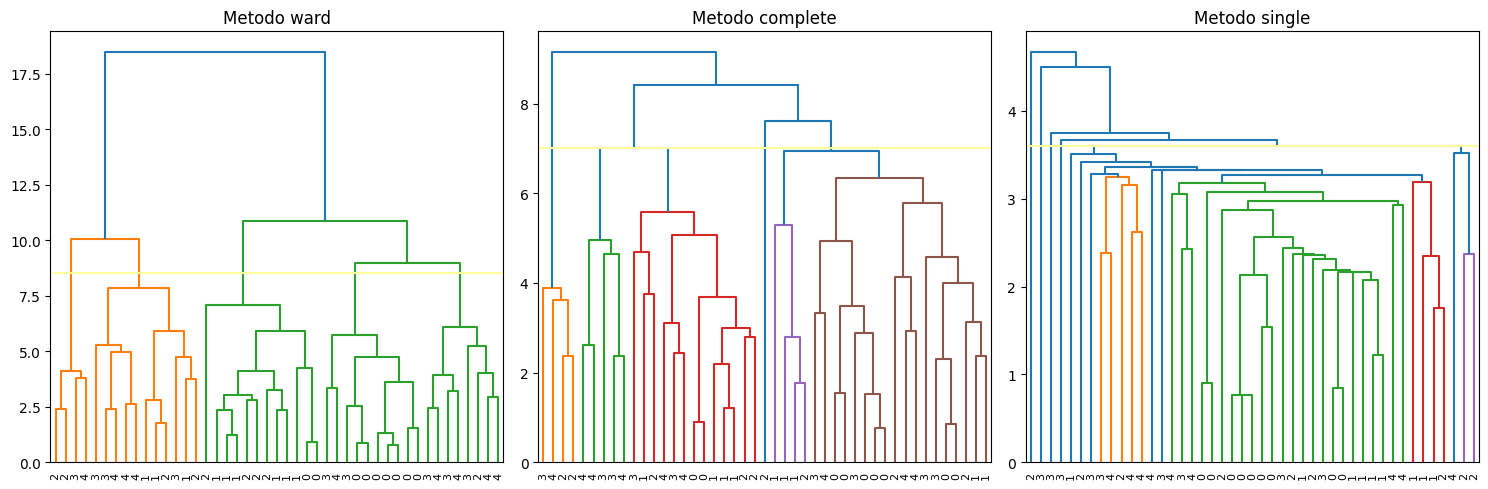

In [22]:
Z1 = linkage(X_s, method='ward', metric='euclidean')
Z2 = linkage(X_s, method='complete', metric='euclidean')
Z3 = linkage(X_s, method='single', metric='euclidean')

 #Diccionario de tratamientos
tratamientos = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4'}

# Graficar los dendrogramas con los nombres de los tratamientos
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# Obtener las etiquetas de los tratamientos correspondientes a cada muestra
etiquetas = [tratamientos[tratamiento] for tratamiento in y]

plt.subplot(1,3,1)
dendrogram(Z1, labels=etiquetas, leaf_rotation=90, ax=axs[0])
plt.title('Metodo ward')
plt.axhline(8.5,color='#FFFF99')

plt.subplot(1,3,2)
dendrogram(Z2, labels=etiquetas, leaf_rotation=90, ax=axs[1])
plt.title('Metodo complete')
plt.axhline(7,color='#FFFF99')

plt.subplot(1,3,3)
dendrogram(Z3, labels=etiquetas, leaf_rotation=90, ax=axs[2])
plt.title('Metodo single')
plt.axhline(3.6,color='#FFFF99')
plt.tight_layout()

plt.show()

In [23]:
max_d = 8.5
grp_h = fcluster(Z1, max_d, criterion='distance')
print(pd.crosstab(y, grp_h))
print()

max_d = 7
grp_h = fcluster(Z2, max_d, criterion='distance')
print(pd.crosstab(y, grp_h))
print()

max_d = 3.6
grp_h = fcluster(Z3, max_d, criterion='distance')
print(pd.crosstab(y, grp_h))

# El algoritmo que mejor lo clasifico fue el ward porque fue el que asemejo mas los tamños de los grupos
#en los 5 tratamientos

col_0        1  2  3  4  5
Tratamiento               
0            0  0  2  7  0
1            0  3  6  0  0
2            2  2  4  0  1
3            1  3  0  2  3
4            1  3  0  1  4

col_0        1  2  3  4  5
Tratamiento               
0            0  0  2  7  0
1            0  0  4  5  0
2            2  0  3  3  1
3            1  2  2  4  0
4            1  3  2  3  0

col_0        1  2  3  4  5
Tratamiento               
0            9  0  0  0  0
1            9  0  0  0  0
2            8  0  0  0  1
3            6  1  1  1  0
4            9  0  0  0  0


In [24]:
# Metodo k medias

km = KMeans(n_clusters=5, algorithm='lloyd')
km.fit(X_s)
grp_km = km.predict(X_s)
print(pd.crosstab(y, grp_km))

col_0        0  1  2  3  4
Tratamiento               
0            7  0  2  0  0
1            0  0  8  0  1
2            1  0  4  2  2
3            3  2  0  3  1
4            2  3  0  3  1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

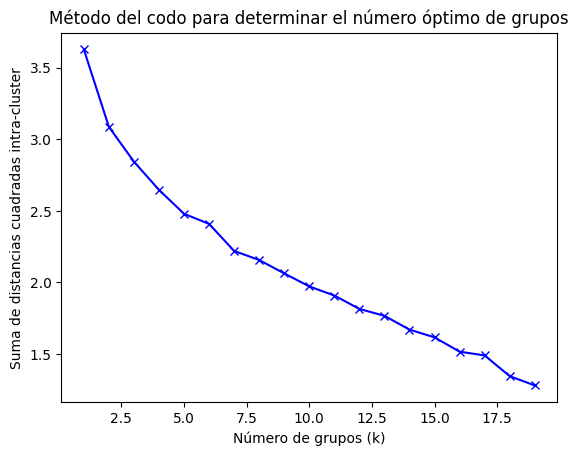

In [25]:
#El método del codo
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist


# Calcular la suma de las distancias cuadradas intra-cluster para diferentes valores de k
distortions = []
K = range(1, 20)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_s)
    distortions.append(sum(np.min(cdist(X_s, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X_s.shape[0])

# Graficar la curva del codo
plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de grupos (k)')
plt.ylabel('Suma de distancias cuadradas intra-cluster')
plt.title('Método del codo para determinar el número óptimo de grupos')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

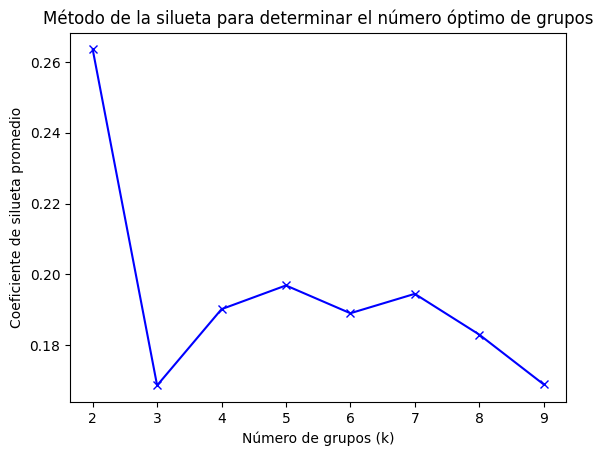

In [26]:
#Metodo de la silueta
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Calcular la silueta para diferentes valores de k
silhouette_scores = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_s)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_s, labels)
    silhouette_scores.append(silhouette_avg)

# Graficar el coeficiente de silueta promedio para cada valor de k
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Número de grupos (k)')
plt.ylabel('Coeficiente de silueta promedio')
plt.title('Método de la silueta para determinar el número óptimo de grupos')
plt.show()
